<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Redução de Dimensionalidade: PCA

## Hands On: Base de Vinhos

### Importação das bibliotecas

In [1]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

# Módulos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Módulos de Modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

# Métricas de Desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp

In [2]:
# Função para cálculo do KS
def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y==1], y_pred[y!=1]).statistic

# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):
    
    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]

    ypred_test = modelo.predict(x_test)
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)
    
    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)
    
    ks_train = ks_stat(y_train, ypred_proba_train)
    ks_test = ks_stat(y_test, ypred_proba_test)
    
    prec_train = precision_score(y_train, ypred_train)
    prec_test = precision_score(y_test, ypred_test)
    
    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)
    
    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, ks_train, 
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, ks_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','KS',
                                   'Precision','Recall','F1'])
    
    df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)
    
    return df_desemp

### Importação da base de dados

In [3]:
df = pd.read_csv('winequality-red.csv')
df['qualidade'] = np.where(df['quality'] >= 7, 1, 0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


### Separação das bases em Treino e Teste

In [4]:
# Separação das variáveis explicativas e a variável target
x_var = ['fixed acidity','volatile acidity','citric acid',
         'residual sugar','chlorides','free sulfur dioxide',
         'total sulfur dioxide','density','pH','sulphates','alcohol']
y_var = 'qualidade'

x_train, x_test, y_train, y_test = train_test_split(df[x_var], 
                                                    df[y_var],
                                                    test_size=0.30,
                                                    random_state=42)

### Modelo Baseline: Gradient Tree Boosting base original

In [5]:
modelo = GradientBoostingClassifier(random_state=42, 
                                    max_depth=1,
                                    n_estimators=50)
modelo.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=42)

### Desempenho do modelo

In [6]:
calcula_desempenho(modelo, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.902592,0.852083,-0.06
AUROC,0.901538,0.853095,-0.05
KS,0.664417,0.618301,-0.07
Precision,0.859649,0.416667,-0.52
Recall,0.326667,0.149254,-0.54
F1,0.473430,0.219780,-0.54


## Aplicação do PCA

In [7]:
# Definição de 2 componentes principais
pca = PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [8]:
# Percentual de retenção de variabilidade
pca.explained_variance_ratio_

array([0.94856129, 0.04642631])

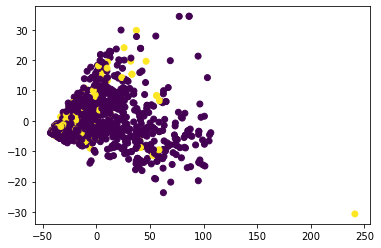

In [9]:
z_train = pca.transform(x_train)
plt.scatter(z_train[:,:1],z_train[:,1:],c=y_train);

**Comentários:**
Não existem clusters muito bem definidos nessa visualização.

### Modelo Baseline: Gradient Tree Boosting PCA
Utilizando 2 componentes principais

In [10]:
z_train = pca.transform(x_train)
z_test = pca.transform(x_test)

In [11]:
modelo2 = GradientBoostingClassifier(random_state=42, 
                                     n_estimators=50)
modelo2.fit(z_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

### Desempenho do modelo

In [12]:
calcula_desempenho(modelo2, z_train, y_train, z_test, y_test)

,Treino,Teste,Variação
Acurácia,0.894549,0.868750,-0.03
AUROC,0.886897,0.710057,-0.20
KS,0.583364,0.322106,-0.45
Precision,1.000000,0.666667,-0.33
Recall,0.213333,0.119403,-0.44
F1,0.351648,0.202532,-0.42
